Comparación entre potencia y desviación estándar para una señal de ruido blanca filtra con diferentes anchos de filtro.
El nivel de ruido viene dado por la pérdida de varianza con el filtrado de la señal.

# Con filtro paso bajo

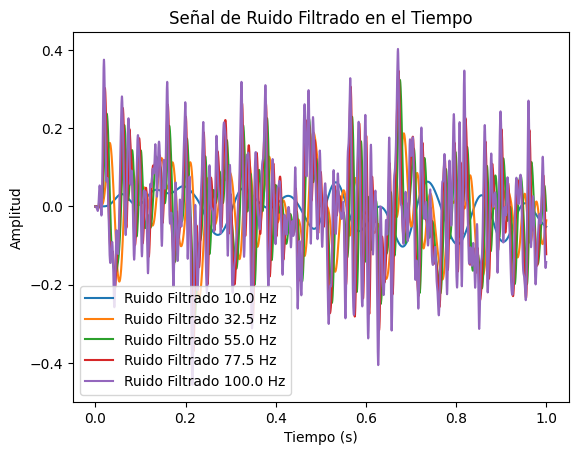

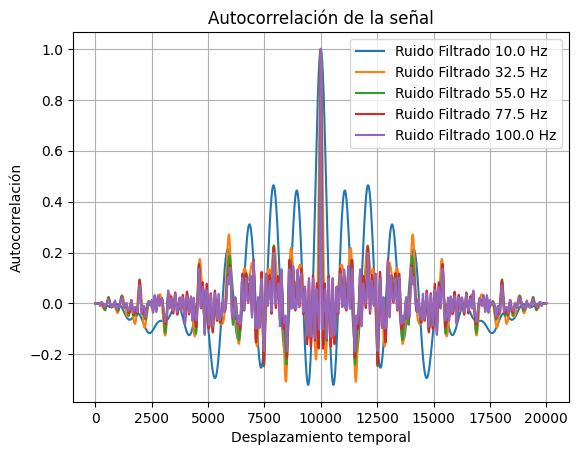

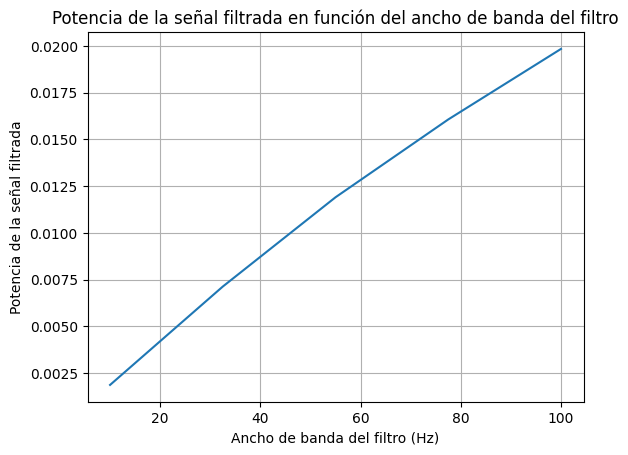

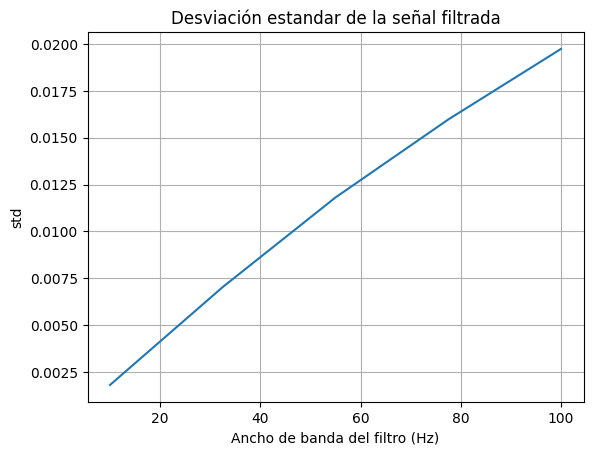

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

tiempo_total = 1  
fs = 10000 
s_length = int(tiempo_total * fs)

w_noise = np.random.normal(0, 1, s_length)

order = 5
bw_linspace = np.linspace(10, 100, 5)
sig_list = []
pot_list = []
std_list = []
autocorr_list = []

for bw in bw_linspace:
    b, a = signal.butter(order, bw / (fs / 2), 'low')
    sig_filtered = signal.lfilter(b, a, w_noise)
    sig_list.append(sig_filtered)
    pot_list.append(np.sum(sig_filtered**2) / s_length) #Potencia
    std_list.append(np.std(sig_filtered))

    autocorr_sig_filtered = np.correlate(sig_filtered, sig_filtered, mode='full')
    autocorr_sig_filtered /= np.max(autocorr_sig_filtered)
    autocorr_list.append(autocorr_sig_filtered)

for bw_i, sig_list_i in zip(bw_linspace, sig_list):
    plt.plot(np.linspace(0, tiempo_total, s_length), sig_list_i, label=f'Ruido Filtrado {bw_i} Hz')
plt.title('Señal de Ruido Filtrado en el Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

for bw_i, autocorr_i in zip(bw_linspace, autocorr_list):
    plt.plot(autocorr_i, label=f'Ruido Filtrado {bw_i} Hz')
plt.title('Autocorrelación de la señal')
plt.xlabel('Desplazamiento temporal')
plt.ylabel('Autocorrelación')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(bw_linspace, pot_list)
plt.xlabel('Ancho de banda del filtro (Hz)')
plt.ylabel('Potencia de la señal filtrada')
plt.title('Potencia de la señal filtrada en función del ancho de banda del filtro')
plt.grid(True)
plt.show()

plt.plot(bw_linspace, std_list)
plt.xlabel('Ancho de banda del filtro (Hz)')
plt.ylabel('std')
plt.title('Desviación estandar de la señal filtrada')
plt.grid(True)
plt.show()


# Con filtro paso alto

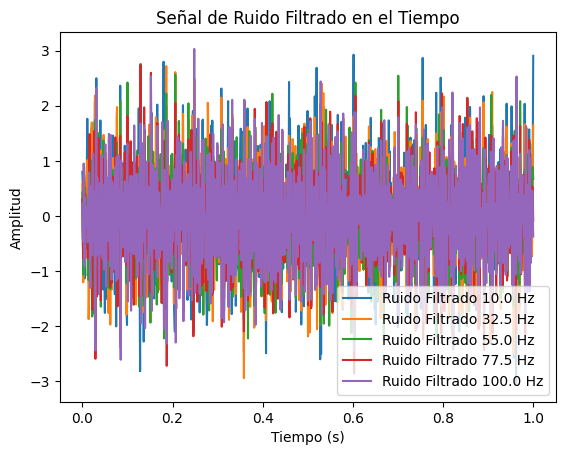

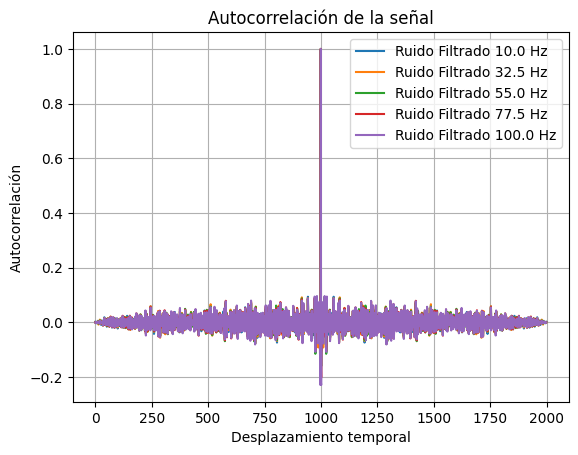

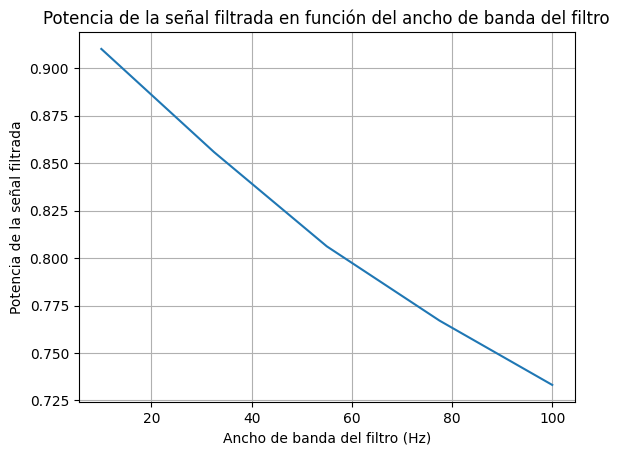

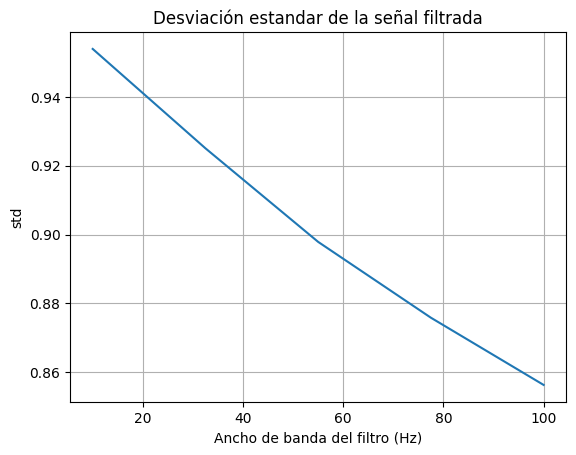

In [9]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

tiempo_total = 1  
fs = 1000  
s_length = int(tiempo_total * fs)

w_noise = np.random.normal(0, 1, s_length)

order = 7
bw_linspace = np.linspace(10, 100, 5)
sig_list = []
pot_list = []
std_list = []
autocorr_list = []

for bw in bw_linspace:
    b, a = signal.butter(order, bw / (fs / 2), 'high')
    sig_filtered = signal.lfilter(b, a, w_noise)
    sig_list.append(sig_filtered)
    pot_list.append(np.sum(sig_filtered**2) / s_length) #Potencia
    std_list.append(np.std(sig_filtered))

    autocorr_sig_filtered = np.correlate(sig_filtered, sig_filtered, mode='full')
    autocorr_sig_filtered /= np.max(autocorr_sig_filtered)
    autocorr_list.append(autocorr_sig_filtered)

for bw_i, sig_list_i in zip(bw_linspace, sig_list):
    plt.plot(np.linspace(0, tiempo_total, s_length), sig_list_i, label=f'Ruido Filtrado {bw_i} Hz')
plt.title('Señal de Ruido Filtrado en el Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

for bw_i, autocorr_i in zip(bw_linspace, autocorr_list):
    plt.plot(autocorr_i, label=f'Ruido Filtrado {bw_i} Hz')
plt.title('Autocorrelación de la señal')
plt.xlabel('Desplazamiento temporal')
plt.ylabel('Autocorrelación')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(bw_linspace, pot_list)
plt.xlabel('Ancho de banda del filtro (Hz)')
plt.ylabel('Potencia de la señal filtrada')
plt.title('Potencia de la señal filtrada en función del ancho de banda del filtro')
plt.grid(True)
plt.show()

plt.plot(bw_linspace, std_list)
plt.xlabel('Ancho de banda del filtro (Hz)')
plt.ylabel('std')
plt.title('Desviación estandar de la señal filtrada')
plt.grid(True)
plt.show()
